In [4]:
from google.colab import drive
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [5]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [6]:
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/ColabData/AVG/'

Mounted at /content/drive


In [7]:
def load_data(data_type, base_path='/content/drive/MyDrive/ColabData/AVG/'):
    """
    Load AHP data from pickle files.

    Args:
        data_type (str): Type of data to load (e.g., 'economic', 'social', 'environmental').
        base_path (str): Path to the directory containing results.

    Returns:
        list: A list of data corresponding to different scenarios.
    """
    res = []
    for scenario in ('blastfireball', 'blastshockwave', 'fire'):
        file_path = os.path.join(base_path, data_type, f'ranking_{data_type}{scenario}_variables')

        with open(file_path, 'rb') as file:
            (
                ahp_matrix, g_means, priority_vectors, percent, current_ranking, ranking_ratio,
                sum_g_means, sum_priority_vectors, sum_percent, sum_rankings,
                sum_vector_priority_vector, sum_vpv, consistency_index, consistency_ratio
            ) = pickle.load(file)

        # We use 'percent' instead of 'ranking'
        res.append(percent)

    return res


In [29]:
def get_polar_plot(first, second, third, labels, title):
    """
    Generate a radar (polar) plot for AHP analysis.

    Parameters:
        first (array): Data for 'Fireball'
        second (array): Data for 'Shockwave'
        third (array): Data for 'Fire'
        labels (array): Labels for each parameter
        title (str): Title of the plot
    """

    # Convert data into circular format for radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the circle

    first = np.concatenate((first, [first[0]]))
    second = np.concatenate((second, [second[0]]))
    third = np.concatenate((third, [third[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    # Set up the polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    ax.plot(angles, first, 'o-', linewidth=2, label="Fireball")
    ax.fill(angles, first, alpha=0.25)

    ax.plot(angles, second, 'o-', linewidth=2, label="Shockwave")
    ax.fill(angles, second, alpha=0.25)

    ax.plot(angles, third, 'o-', linewidth=2, label="Fire")
    ax.fill(angles, third, alpha=0.25)

    # Improve plot readability
    ax.set_thetagrids(angles * 180 / np.pi, labels)
    ax.yaxis.set_major_formatter('{x:2.0f}%')
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1.1, 1.05))
    ax.grid(True)
    matplotlib.rc('font', family='normal', size=13)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [9]:
# Defining labels
labelsE = np.array(["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"])
labelsS = np.array(["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10"])
labelsA = np.array(["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11"])

In [10]:
def get_plots_auto_ahp():
    """
    Generate radar plots for automatically calculated AHP results.
    """
    economic_data = load_data('economic')
    social_data = load_data('social')
    environmental_data = load_data('environmental')

    get_polar_plot(*economic_data, labelsE, "Economic")
    get_polar_plot(*social_data, labelsS, "Social")
    get_polar_plot(*environmental_data, labelsA, "Environmental")

In [11]:
def get_plots_hand_ahp():
    """
    Generate radar plots for manually calculated AHP results.
    """
    hand_ahp_economic = [
        np.array([1.31, 27.49, 20.24, 9.53, 9.53, 9.53, 14.81, 3.19, 2.48, 1.81]),  # Fireball
        np.array([3.55, 24.42, 16.87, 10.94, 10.94, 10.94, 16.11, 2.44, 1.90, 1.90]),  # Shockwave
        np.array([2.20, 24.01, 19.50, 9.85, 9.67, 9.67, 16.12, 4.50, 2.24, 2.24])  # Fire
    ]

    hand_ahp_social = [
        np.array([21.99, 12.44, 29.16, 4.98, 1.40, 8.11, 12.44, 2.53, 2.22, 4.74]),
        np.array([20.00, 14.75, 22.97, 3.31, 2.60, 9.21, 9.21, 1.33, 1.63, 15]),
        np.array([11.37, 23.01, 30.52, 5.20, 1.63, 7.22, 10.45, 5.24, 2.21, 3.15])
    ]

    hand_ahp_environmental = [
        np.array([8.01, 13.09, 13.09, 5.14, 1.94, 1.94, 8.01, 25.75, 8.01, 1.94, 13.09]),
        np.array([22.99, 1.42, 1.42, 4.51, 1.92, 1.92, 6.71, 6.71, 6.71, 25.34, 20.34]),
        np.array([3.29, 6.82, 6.82, 10.58, 2.22, 2.22, 10.58, 22.66, 16.31, 2.19, 16.31])
    ]

    get_polar_plot(*hand_ahp_economic, labelsE, "Economic")
    get_polar_plot(*hand_ahp_social, labelsS, "Social")
    get_polar_plot(*hand_ahp_environmental, labelsA, "Environmental")

-------------------------------------------------- Auto AHP --------------------------------------------------


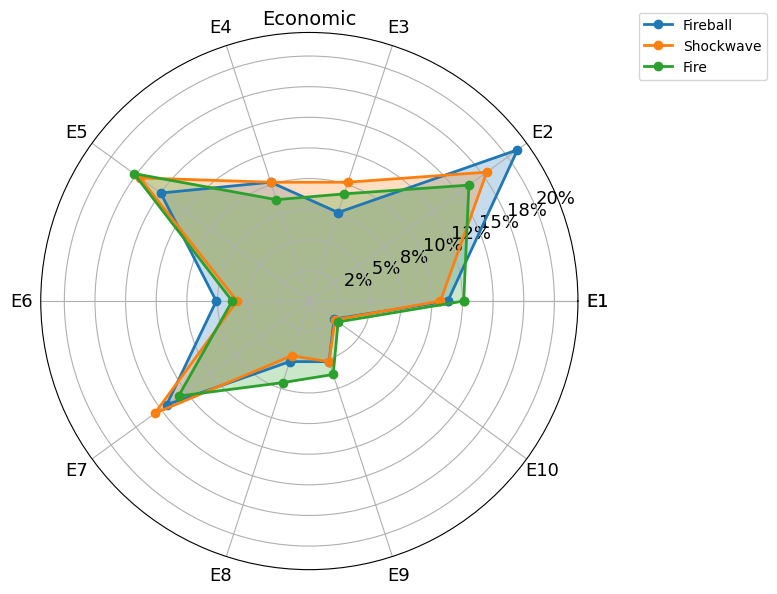

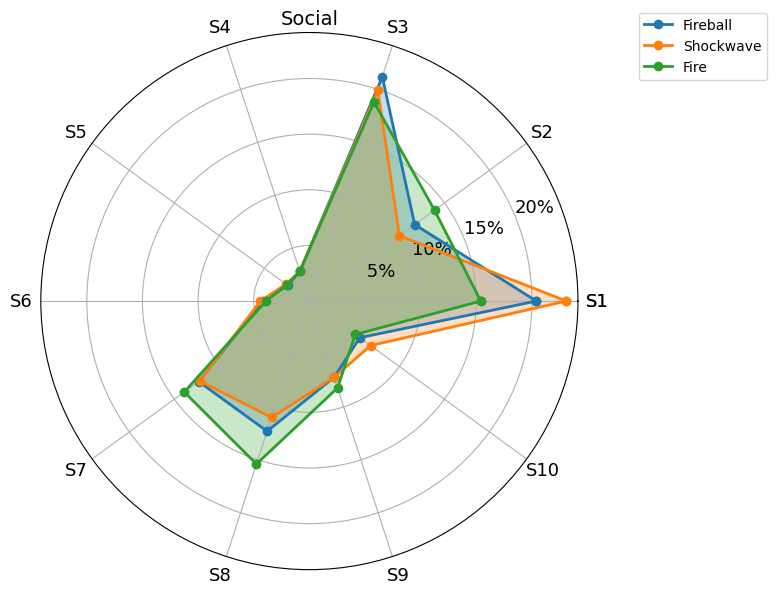

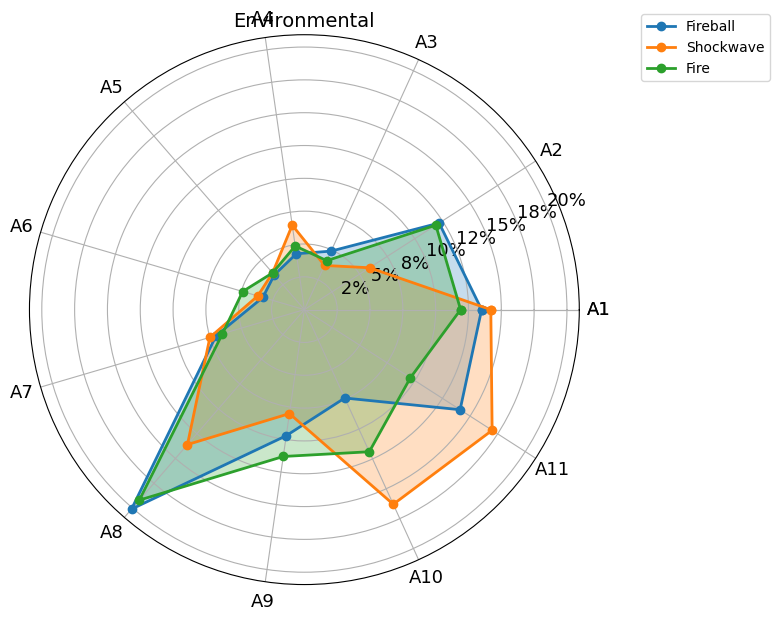

-------------------------------------------------- Hand AHP --------------------------------------------------


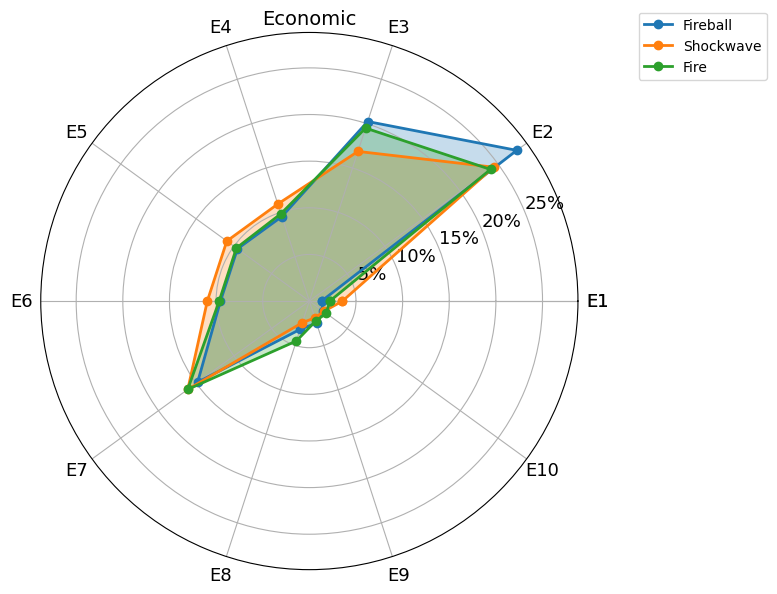

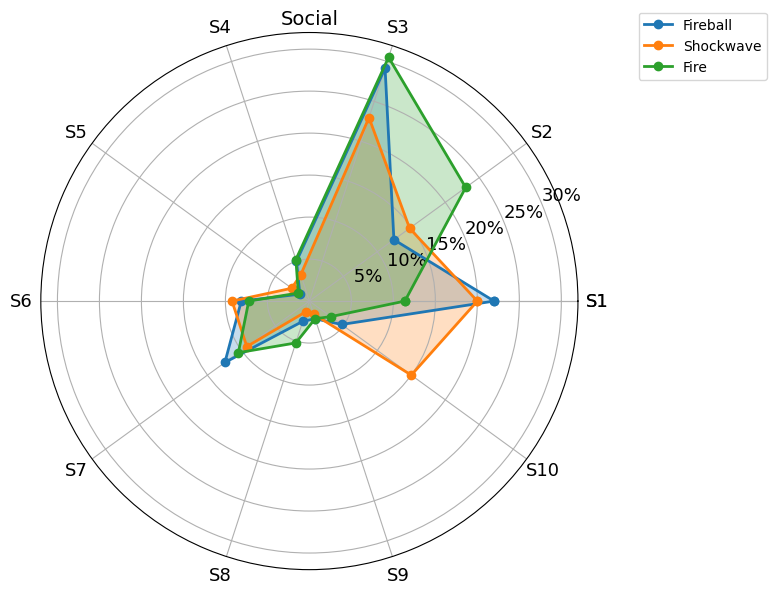

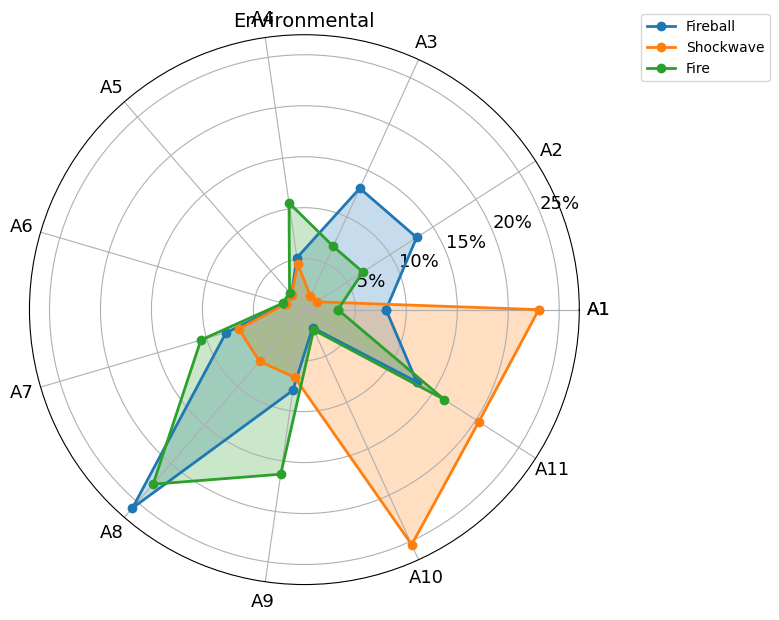

In [30]:
print(50*'-', 'Auto AHP' , 50*'-')
get_plots_auto_ahp()
print(50*'-', 'Hand AHP' , 50*'-')
get_plots_hand_ahp()

The graphs show the results of obtaining the vector of priorities translated into percentages for convenience for manual from expert and machine from algorithm analyses, for each group of factors (economic, social, environmental), grouped by scenarios (explosion with blast wave, fire, fireball)